In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

In [39]:
data = pd.read_csv("digikala-orders.csv", encoding= 'utf-8')
data

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01.000,344037.0,تهران,2.0
199996,4425393,3745774,131645,2016-07-09 19:14:09.000,600000.0,محمدیه,1.0
199997,6671889,4845514,215045,2017-03-08 23:47:06.000,450000.0,اصفهان,1.0
199998,6315995,2541418,264021,2017-02-08 14:59:39.000,193486.0,همدان,1.0


In [6]:
data.isnull().sum()



ï»¿ID_Order              0
ID_Customer              0
ID_Item                  0
DateTime_CartFinalize    0
Amount_Gross_Order       0
city_name_fa             0
Quantity_item            0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [ ]:
data['DateTime_CartFinalize'] = pd.to_datetime(data['DateTime_CartFinalize'])
data['YearMonth'] = data['DateTime_CartFinalize'].dt.to_period('M')
orders_per_month = data.groupby('YearMonth')['ï»¿ID_Order'].count().reset_index()
orders_per_month['YearMonth'] = orders_per_month['YearMonth'].astype(str)  

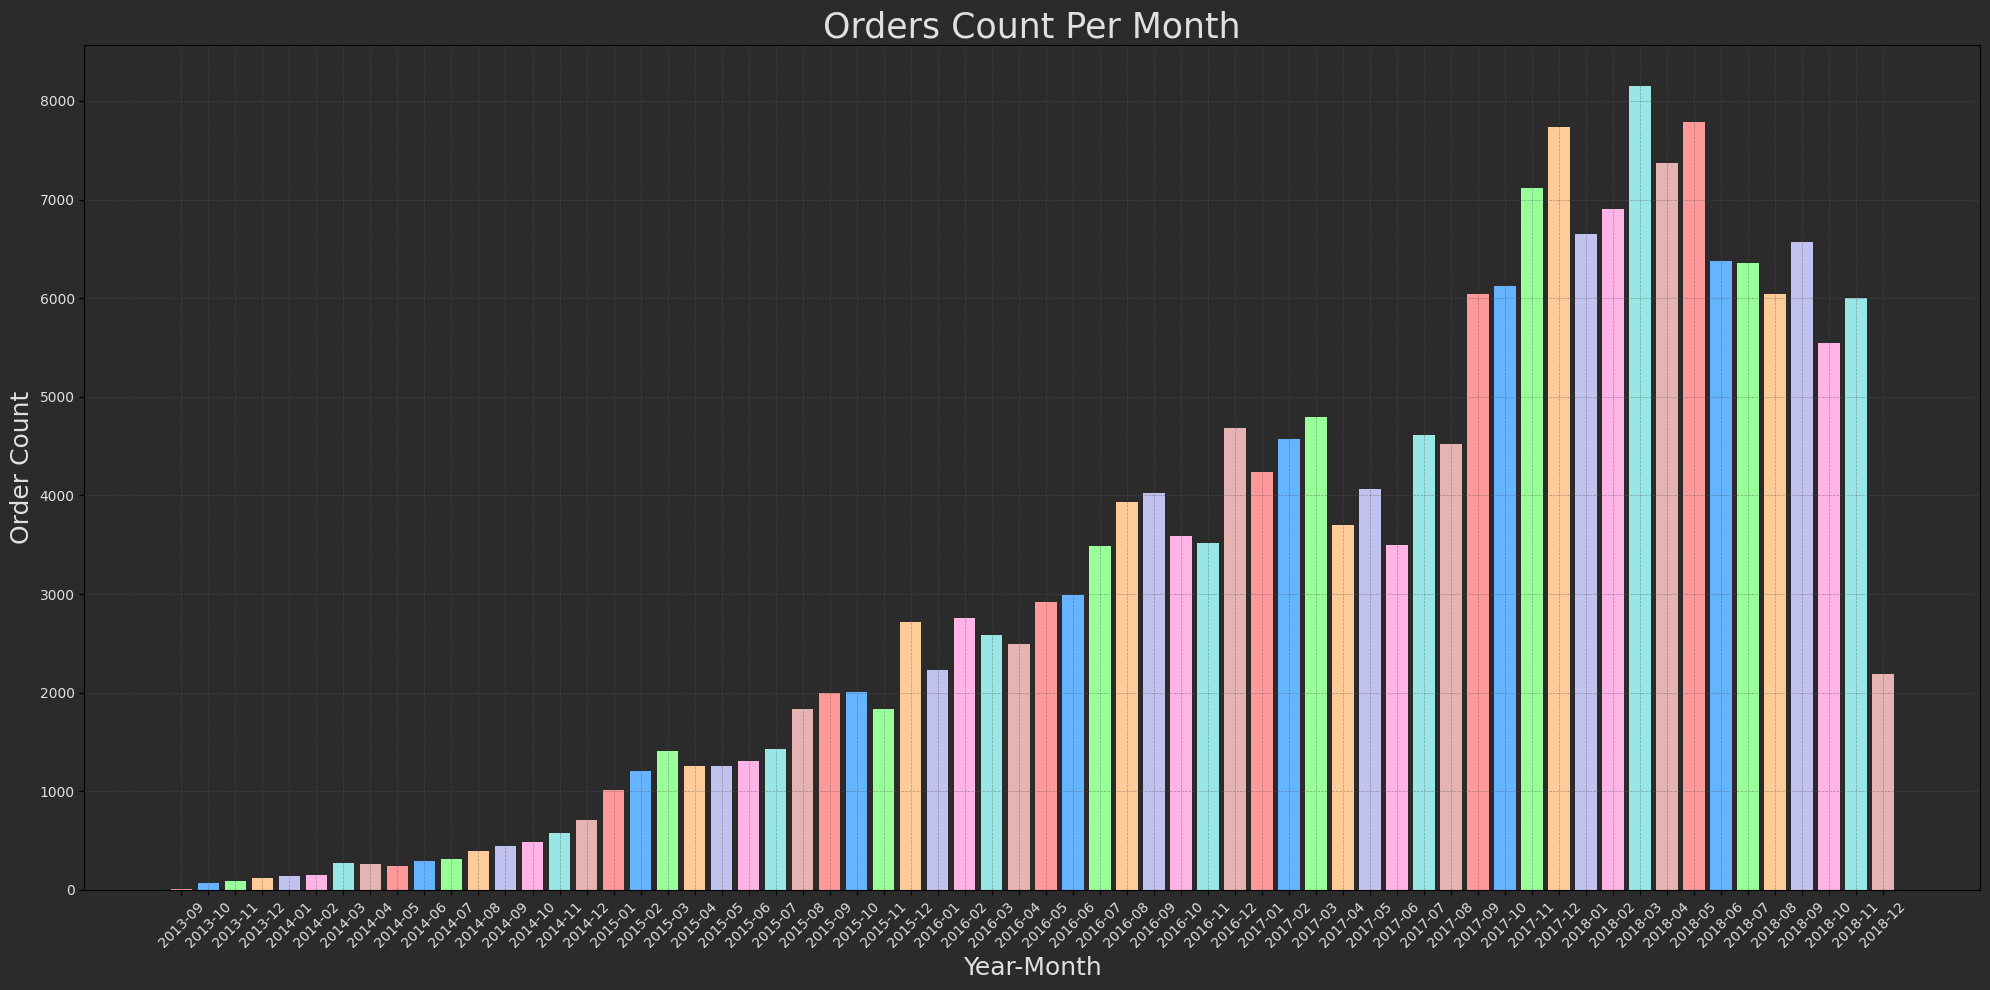

In [ ]:
fig = plt.figure(figsize=(20, 10))
fig.patch.set_facecolor('#2b2b2b')  
ax = plt.gca()
ax.set_facecolor('#2b2b2b')


plt.bar(orders_per_month['YearMonth'], orders_per_month['ï»¿ID_Order'], color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', 
                                                                            '#c2c2f0', '#ffb3e6', '#99e6e6', '#e6b3b3'])


plt.title('Orders Count Per Month', fontsize=25, color='#e0e0e0')
plt.xlabel("Year-Month", fontsize=18, color='#e0e0e0')
plt.ylabel("Order Count", fontsize=18, color='#e0e0e0')
plt.xticks(rotation=45, fontsize=10, color='#e0e0e0')
plt.yticks(fontsize=10, color='#e0e0e0')


plt.grid(color='#555555', linestyle='--', linewidth=0.5, alpha=0.5)


plt.tight_layout()
plt.show()

In [ ]:
customers_per_city = data.groupby('city_name_fa')['ID_Customer'].nunique().reset_index()
customers_per_city = customers_per_city.rename(columns={'ID_Customer': 'CustomerCount'})

target_cities = ['اصفهان', 'تهران', 'مشهد', 'کرج', 'شیراز']

customers_per_city['city_name_fa'] = customers_per_city['city_name_fa'].apply(
    lambda city: city if city in target_cities else 'سایر'
)


customers_per_city = customers_per_city.groupby('city_name_fa')['CustomerCount'].sum().reset_index()


customers_per_city = customers_per_city.sort_values(
    by=['city_name_fa'], key=lambda col: col.eq('سایر').astype(int)
)

findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

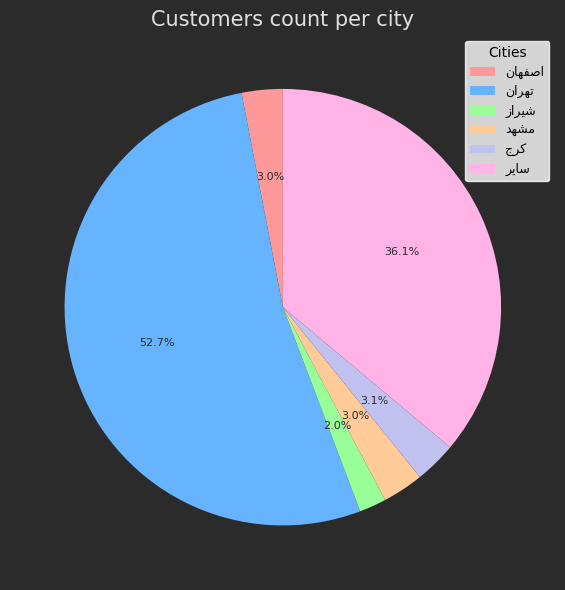

In [58]:
labels = [
    get_display(arabic_reshaper.reshape(label)) for label in customers_per_city['city_name_fa']
]
sizes = customers_per_city['CustomerCount']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#99e6e6', '#e6b3b3']


fig = plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('#2b2b2b')  

wedges, texts, autotexts = plt.pie(sizes, autopct='%1.1f%%', startangle=90, colors=colors)

plt.legend(
    wedges,
    labels,
    title="Cities",
    fontsize=9,
    title_fontsize=10,
    loc="upper right",
    bbox_to_anchor=(1, 1),
    frameon=True,
    edgecolor='white'
)


for autotext in autotexts:
    autotext.set_color('#2b2b2b')
    autotext.set_fontsize(8)  


plt.title('Customers count per city', fontsize=15, color='#e0e0e0')
plt.tight_layout()

plt.show()